# Построение нейронных сетей и объединение всех метрик

## Импорт библиотек

In [6]:
import pandas as pd
import numpy as np
import matplotlib. pyplot as plt
import pickle

from sklearn.metrics import roc_auc_score, accuracy_score, log_loss


from keras.layers import Dense, Flatten
from keras import Sequential
from keras.models import Sequential
from keras.optimizers import Adam, SGD
from keras.models import load_model
from keras.utils import to_categorical
from keras import metrics

## Построение моделей сетей

In [7]:
# Загрузка данных
df_train = pd.read_csv('data/train_data_processed.csv')
df_test = pd.read_csv('data/test_data_processed.csv')
df_valid = pd.read_csv('data/valid_data_processed.csv')

In [8]:
feature_columns = [
    'Client_age', 'Gender', 'Numb_of_Prod', 'Salary',
    'HasCrCard', 'Numb_of_years', 'CreditScore', 'Balance', 'IsActiveMember',
]
target_col = 'res'

In [9]:
# Строим модель

model_1 = Sequential([
    Dense(7, input_shape=(9,), activation='relu'),
    Dense(7, activation='sigmoid'),
    Dense(2, activation='softmax'),
])

model_2 = Sequential([
    Dense(10, input_shape=(9,), activation='relu'),
    Dense(10, activation='sigmoid'),
    Dense(2, activation='softmax'),
])

model_3 = Sequential([
    Dense(13, input_shape=(9,), activation='relu'),
    Dense(13, activation='sigmoid'),
    Dense(2, activation='softmax'),
])

model_4 = Sequential([
    Dense(7, input_shape=(9,), activation='relu'),
    Dense(7, activation='relu'),
    Dense(7, activation='sigmoid'),
    Dense(2, activation='softmax'),
])

model_5 = Sequential([
    Dense(7, input_shape=(9,), activation='relu'),
    Dense(7, activation='relu'),
    Dense(7, activation='relu'),
    Dense(7, activation='sigmoid'),
    Dense(2, activation='softmax'),
])

model_6 = Sequential([
    Dense(7, input_shape=(9,), activation='relu'),
    Dense(7, activation='relu'),
    Dense(2, activation='softmax'),
])

model_7 = Sequential([
    Dense(7, input_shape=(9,), activation='relu'),
    Dense(7, activation='relu'),
    Dense(7, activation='relu'),
    Dense(2, activation='softmax'),
])

models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7]

In [ ]:
logs = []
for model in models:

    # Задание параметров обучения модели
    model.compile(
        loss='categorical_crossentropy', # Функция потерь
        optimizer=Adam(0.1), # Алгоритм поиска минимума и его шаг
        metrics=['accuracy', metrics.AUC()] # Метрики, которые будем отслеживать
    )

    # Обучение модели
    log = model.fit(
        pd.concat([df_train[feature_columns], df_valid[feature_columns]]),
        to_categorical(
            pd.concat([df_train[target_col], df_valid[target_col]]), 2,
        ),
        batch_size=64,
        epochs=15,
        validation_split=0.2,
    )

    logs.append(log)

#### Сохранение моделей

In [11]:
# Сохранение моделей

for i, model in enumerate(models):
     model.save(f'models/model_nn_{i}.h5')

## Построение LOSS, AUC и ACCURACY кривых

#### Первое представление графиков (один график на модель)

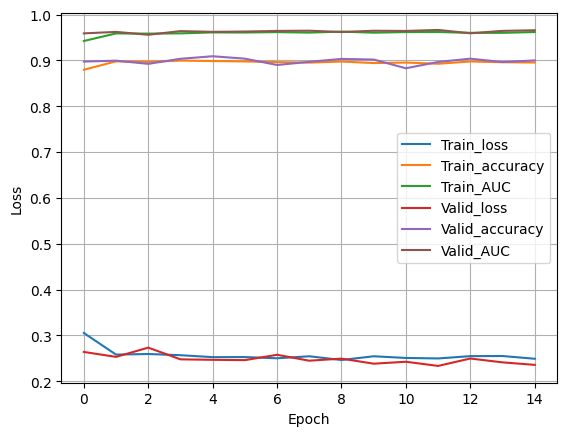

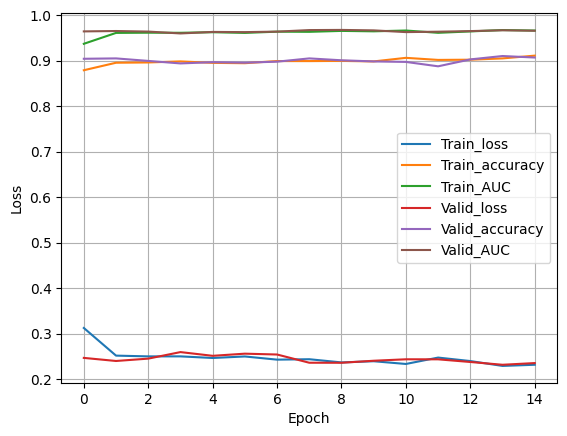

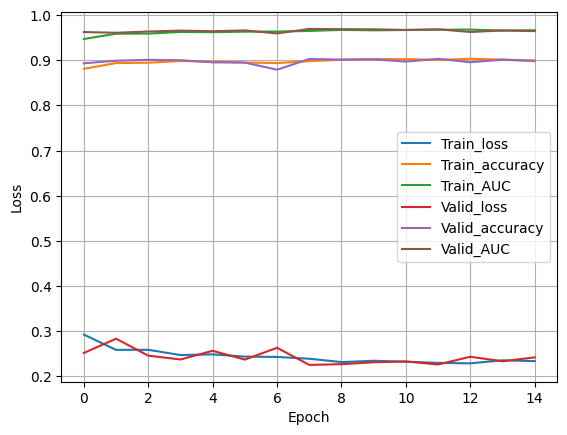

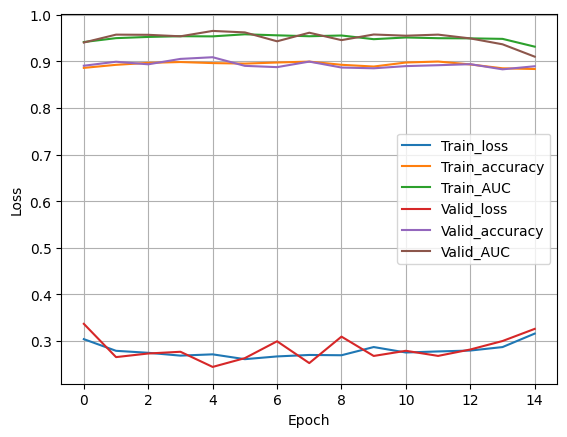

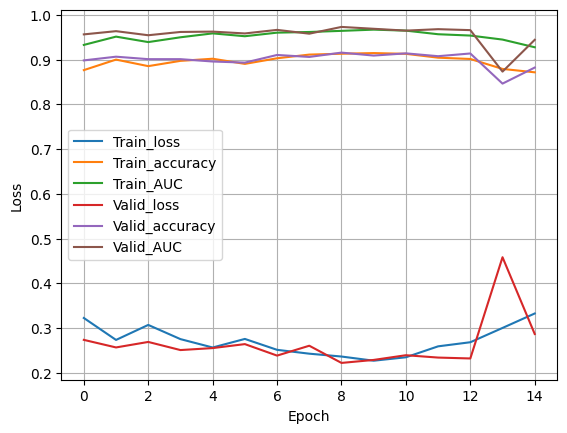

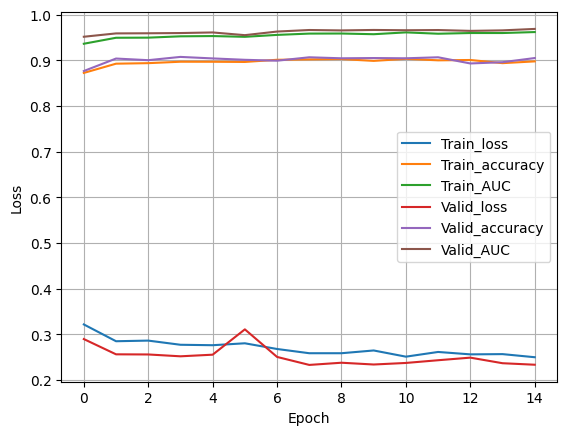

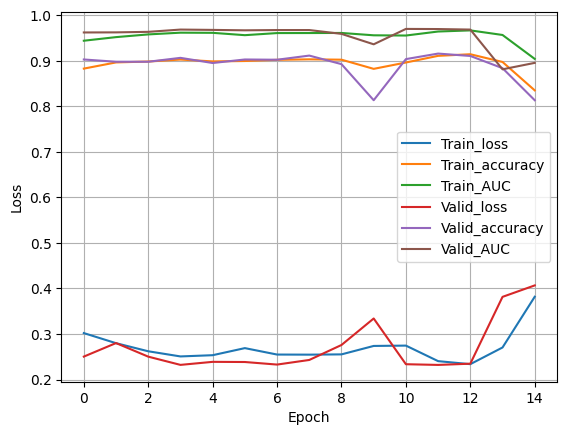

In [15]:
figs1 = []
for i, log in enumerate(logs):
    fig = plt.figure()
    plt.plot(log.history['loss'], label='Train_loss')
    plt.plot(log.history['accuracy'], label='Train_accuracy')
    plt.plot(log.history[f'auc_{i + 1}'], label='Train_AUC')
    plt.plot(log.history['val_loss'], label='Valid_loss')
    plt.plot(log.history['val_accuracy'], label='Valid_accuracy')
    plt.plot(log.history[f'val_auc_{i + 1}'], label='Valid_AUC')
    plt.grid(True)
    plt.legend()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    figs1.append(fig)

___Втрое представление графиков (один график на метрику)___

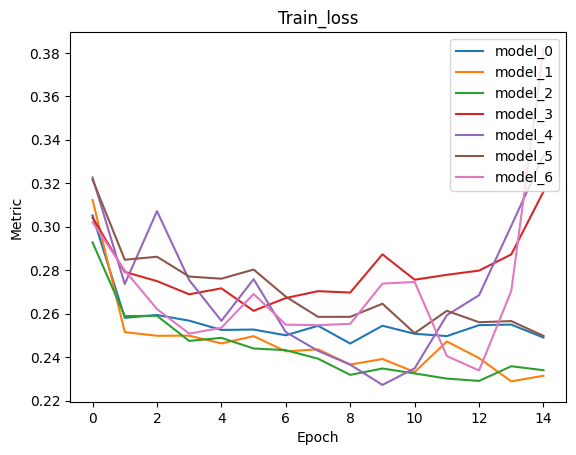

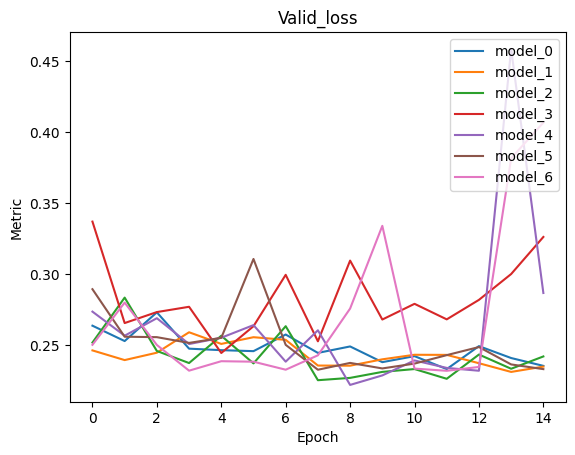

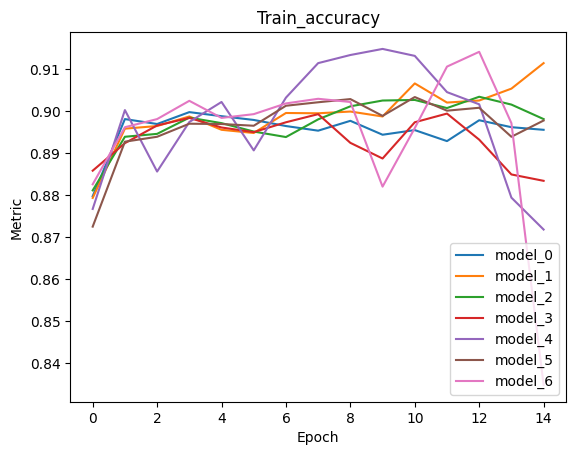

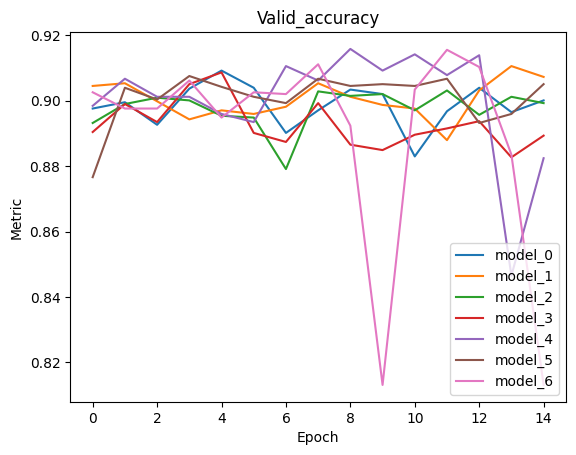

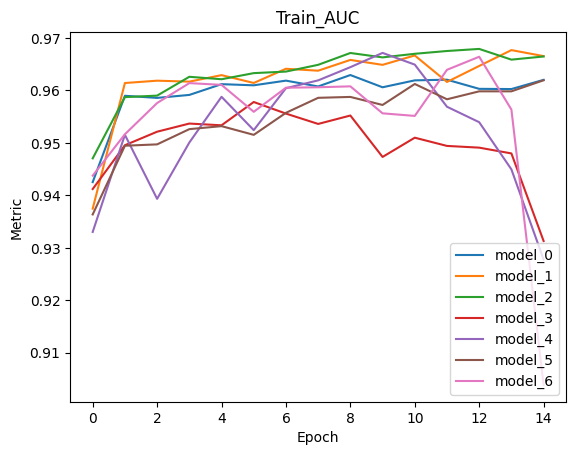

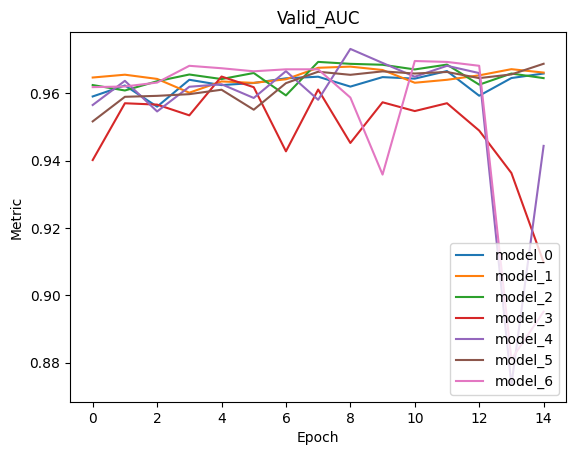

In [17]:
figs2 = []

fig = plt.figure()
for j, log in enumerate(logs):
    plt.title('Train_loss')
    plt.plot(log.history['loss'], label=f'model_{j}')
    plt.xlabel('Epoch')
    plt.ylabel('Metric')
    plt.legend(loc='upper right')
figs2.append(fig)

fig = plt.figure()
for j, log in enumerate(logs):
    plt.title('Valid_loss')
    plt.plot(log.history['val_loss'], label=f'model_{j}')
    plt.xlabel('Epoch')
    plt.ylabel('Metric')
    plt.legend(loc='upper right')
figs2.append(fig)

fig = plt.figure()
for j, log in enumerate(logs):
    plt.title('Train_accuracy')
    plt.plot(log.history['accuracy'], label=f'model_{j}')
    plt.xlabel('Epoch')
    plt.ylabel('Metric')
    plt.legend(loc='lower right')
figs2.append(fig)

fig = plt.figure()
for j, log in enumerate(logs):
    plt.title('Valid_accuracy')
    plt.plot(log.history['val_accuracy'], label=f'model_{j}')
    plt.xlabel('Epoch')
    plt.ylabel('Metric')
    plt.legend(loc='lower right')
figs2.append(fig)

fig = plt.figure()
for j, log in enumerate(logs):
    plt.title('Train_AUC')
    plt.plot(log.history[f'auc_{j+1}'], label=f'model_{j}')
    plt.xlabel('Epoch')
    plt.ylabel('Metric')
    plt.legend(loc='lower right')
figs2.append(fig)

fig = plt.figure()
for j, log in enumerate(logs):
    plt.title('Valid_AUC')
    plt.plot(log.history[f'val_auc_{j+1}'], label=f'model_{j}')
    plt.xlabel('Epoch')
    plt.ylabel('Metric')
    plt.legend(loc='lower right')
figs2.append(fig)

___Сохранение графиков___

In [18]:
# Сохранение графиков (1 представление)

for i, fig in enumerate(figs1):
    fig.savefig(f'docs/ntwrks_err_fig1/fig1_{i}.pdf')

# Сохранение графиков (2 предсьавление)

for i, fig in enumerate(figs2):
    fig.savefig(f'docs/ntwrks_err_fig2/fig2_{i}.pdf')

___Сохранение метрик___

In [ ]:
# Сохраняем метрики нейронок в датафрейм

df_metrics = pd.DataFrame(columns=[ 
    'Train_loss', 'Valid_loss', 'Test_loss',
    'Train_accuracy', 'Valid_accuracy', 'Test_accuracy',
    'Train_AUC', 'Valid_AUC', 'Test_AUC',
])

# row - это список метрик (loss,accuracy, AUC), например row = [0.24099008738994598, 0.9061775207519531, 0.9666451215744019]
# эти метрики мы указали ранее, при обучении моделей 
   ## мы не указали функцию потерь, в таком случае в keras используется 'categorical_crossentropy' автоматически (таким образом loss считается по умолчанию)
# row+= - добавляем метрики для valid и test датасетах
for i, model in enumerate(models):
    row = model.evaluate(
        df_train[feature_columns],
        to_categorical(df_train[target_col], 2))
    row += model.evaluate(
        df_valid[feature_columns],
        to_categorical(df_valid[target_col], 2))
    row += model.evaluate(
        df_test[feature_columns],
        to_categorical(df_test[target_col], 2))
    row = [round(j, 3) for j in row]

    df_metrics.loc[f'model_{i}'] = row
    

In [20]:
df_metrics.to_csv('data/metrics_nn.csv')

## Объединение всех полученных метрик в один файл

___Загрузка необходимых файлов___

In [21]:
# Подгружаем модели МО

with open('models/model_xgb.pkl', 'rb') as f:
    model_xgb = pickle.load(f)
with open('models/model_lgb.pkl', 'rb') as f:
    model_lgb = pickle.load(f)
with open('models/model_rf.pkl', 'rb') as f:
    model_rf = pickle.load(f)
with open('models/model_log.pkl', 'rb') as f:
    model_log = pickle.load(f)

In [22]:
# Подгружаем датасет с метриками нейронок

df_metrics = pd.read_csv('data/metrics_nn.csv')
df_metrics = df_metrics.set_index('Unnamed: 0')

In [23]:
models_ml = [model_xgb, model_lgb, model_rf, model_log]
names = ['model_xgb', 'model_lgb', 'model_rf', 'model_log']

___Получение метрик моделей МО и их добавление к метрикам нейронок___

In [24]:
df_metrics

,Train_loss,Valid_loss,Test_loss,Train_accuracy,Valid_accuracy,Test_accuracy,Train_AUC,Valid_AUC,Test_AUC
Unnamed: 0,,,,,,,,,
model_0,0.237,0.900,0.965,0.242,0.898,0.964,0.237,0.905,0.964
model_1,0.227,0.912,0.968,0.241,0.905,0.964,0.227,0.914,0.968
model_2,0.239,0.904,0.966,0.248,0.896,0.963,0.244,0.908,0.965
model_3,0.323,0.891,0.911,0.331,0.887,0.908,0.315,0.896,0.913
model_4,0.294,0.882,0.942,0.291,0.881,0.943,0.293,0.888,0.941
model_5,0.238,0.905,0.967,0.238,0.901,0.967,0.237,0.907,0.967
model_6,0.414,0.817,0.894,0.407,0.811,0.894,0.406,0.821,0.898


In [25]:
# Сохраняем все метрики в датафрейм

# model.predict_proba() - возвращает вероятности принадлежности объектов к классу (вчер-ть ухода клиента) -> preds_x
# model.predict() - возвращает предсказанные классы для объектов (0 или 1 в нашем случае (бинарная классификация)) -> labels_x

# log_loss() - вычисляет логарифмическую потерю между истинными метками df_x[target_col] и предсказанными вероятностями preds_x
# accuracy_score() - вычисляет точность между истинными метками df_x[target_col] и предсказанными метками labels_x (долю правильно классифицированных объектов). 
# roc_auc_score() - вычисляет площадь под ROC-кривой (AUC) между истинными метками df_x[target_col] и вероятностями класса 1, предсказанными моделью preds_x.


for i, model in enumerate(models_ml):

    preds_train = model.predict_proba(df_train[feature_columns])[:,1]
    preds_valid = model.predict_proba(df_valid[feature_columns])[:,1]
    preds_test = model.predict_proba(df_test[feature_columns])[:,1]

    labels_train = model.predict(df_train[feature_columns])
    labels_valid = model.predict(df_valid[feature_columns])
    labels_test = model.predict(df_test[feature_columns])

    row = [
        #names[i],
        log_loss(df_train[target_col], preds_train),
        log_loss(df_valid[target_col], preds_valid),
        log_loss(df_test[target_col], preds_test),
        accuracy_score(df_train[target_col], labels_train),
        accuracy_score(df_valid[target_col], labels_valid),
        accuracy_score(df_test[target_col], labels_test),
        roc_auc_score(df_train[target_col], preds_train),
        roc_auc_score(df_valid[target_col], preds_valid),
        roc_auc_score(df_test[target_col], preds_test),
    ]
    row = [round(j, 3) if j is not None and type(j) != str else j for j in row]

    df_metrics.loc[names[i]] = row

In [26]:
df_metrics

,Train_loss,Valid_loss,Test_loss,Train_accuracy,Valid_accuracy,Test_accuracy,Train_AUC,Valid_AUC,Test_AUC
Unnamed: 0,,,,,,,,,
model_0,0.237,0.900,0.965,0.242,0.898,0.964,0.237,0.905,0.964
model_1,0.227,0.912,0.968,0.241,0.905,0.964,0.227,0.914,0.968
model_2,0.239,0.904,0.966,0.248,0.896,0.963,0.244,0.908,0.965
model_3,0.323,0.891,0.911,0.331,0.887,0.908,0.315,0.896,0.913
model_4,0.294,0.882,0.942,0.291,0.881,0.943,0.293,0.888,0.941
model_5,0.238,0.905,0.967,0.238,0.901,0.967,0.237,0.907,0.967
model_6,0.414,0.817,0.894,0.407,0.811,0.894,0.406,0.821,0.898
model_xgb,0.433,0.441,0.428,0.817,0.811,0.821,0.938,0.934,0.933
model_lgb,0.165,0.180,0.176,0.932,0.924,0.928,0.966,0.960,0.956


In [27]:
df_metrics.to_csv('data/metrics_all.csv')